In [37]:
#Importing essential packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
warnings.filterwarnings('ignore')

In [4]:
#Importing training data
training_data=pd.read_csv(r'D:\project\ML_End_to_End_Project\notebook\data\train.csv')
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Understanding

In [5]:
#Basic information about data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From above information it can be interpreted as training data contain missing values. there are 11 independent variables and 1 dependent variable which is loan status. The number of records are 614.

In [8]:
#Statistical analysis of Numeric variable
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The numeric variable applicantIncome,CoapplicantIncome contain lot of variance 

In [9]:
#Statistical analysis of categorical variable
training_data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


The Loan_ID contain all unique values so that information is not much useful in building model . So, that variable can be dropped.

In [11]:
#Dropping Loan_ID variable
training_data=training_data.drop('Loan_ID',axis=1)
training_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [18]:
training_data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

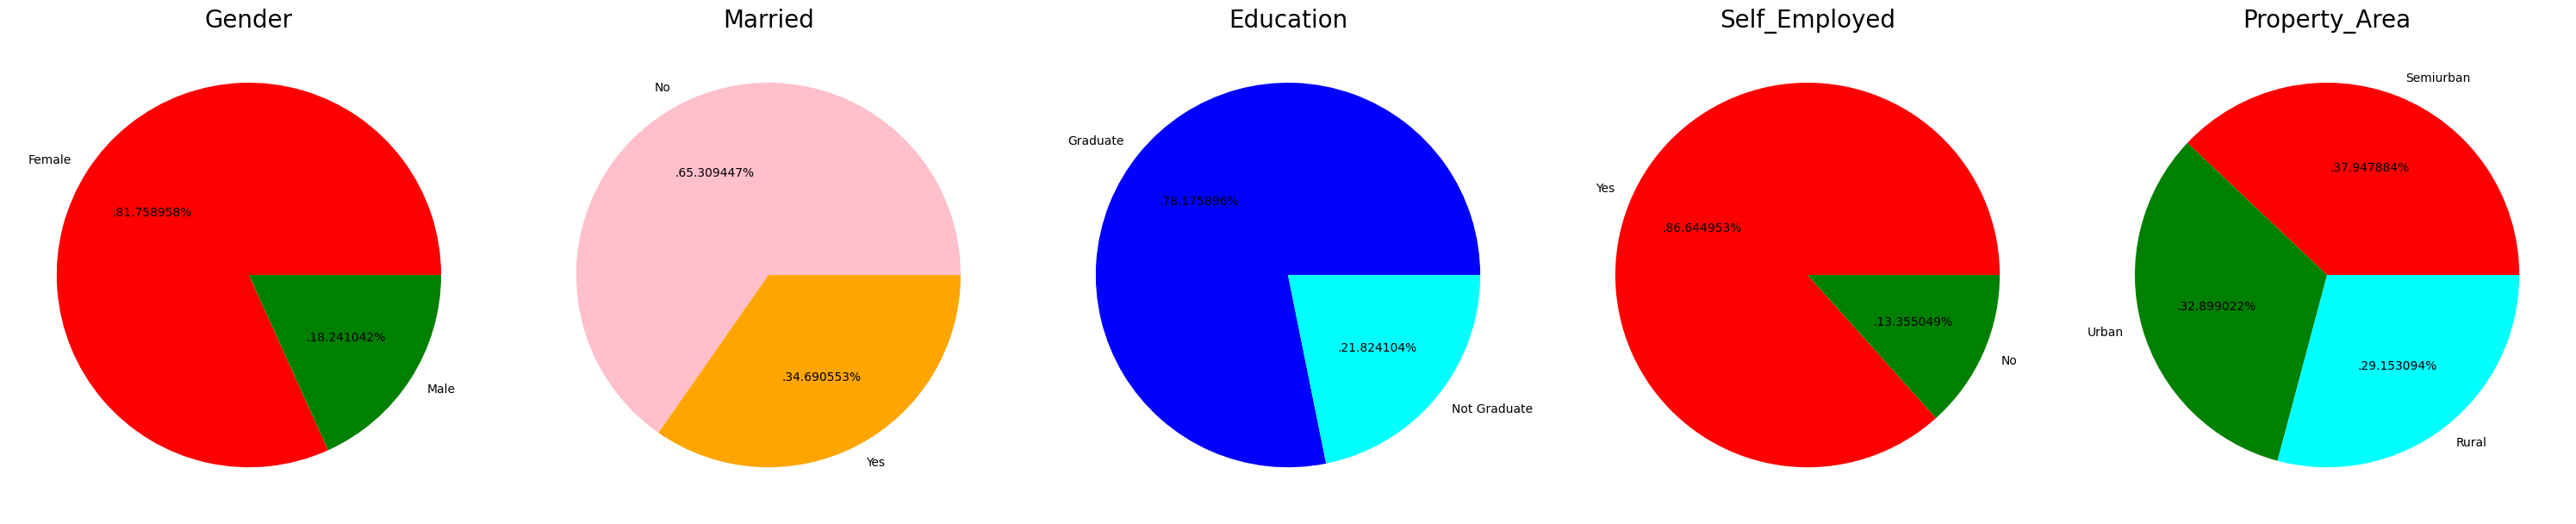

In [33]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = training_data['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = training_data['Married'].value_counts()
labels = 'No', 'Yes'
color = ['pink','orange']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Married', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = training_data['Education'].value_counts()
labels = 'Graduate', 'Not Graduate'
color = ['blue','cyan']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Education', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = training_data['Self_Employed'].value_counts()
labels = 'Yes', 'No'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Self_Employed', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = training_data['Property_Area'].value_counts()
labels = 'Semiurban', 'Urban', 'Rural'
color = ['red','green','cyan']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Property_Area', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

From the above pie charts it can be observed that there is imbalanceness in independent variables. Only property chart is equally distributed.

(-1.25, 1.25, -1.25, 1.25)

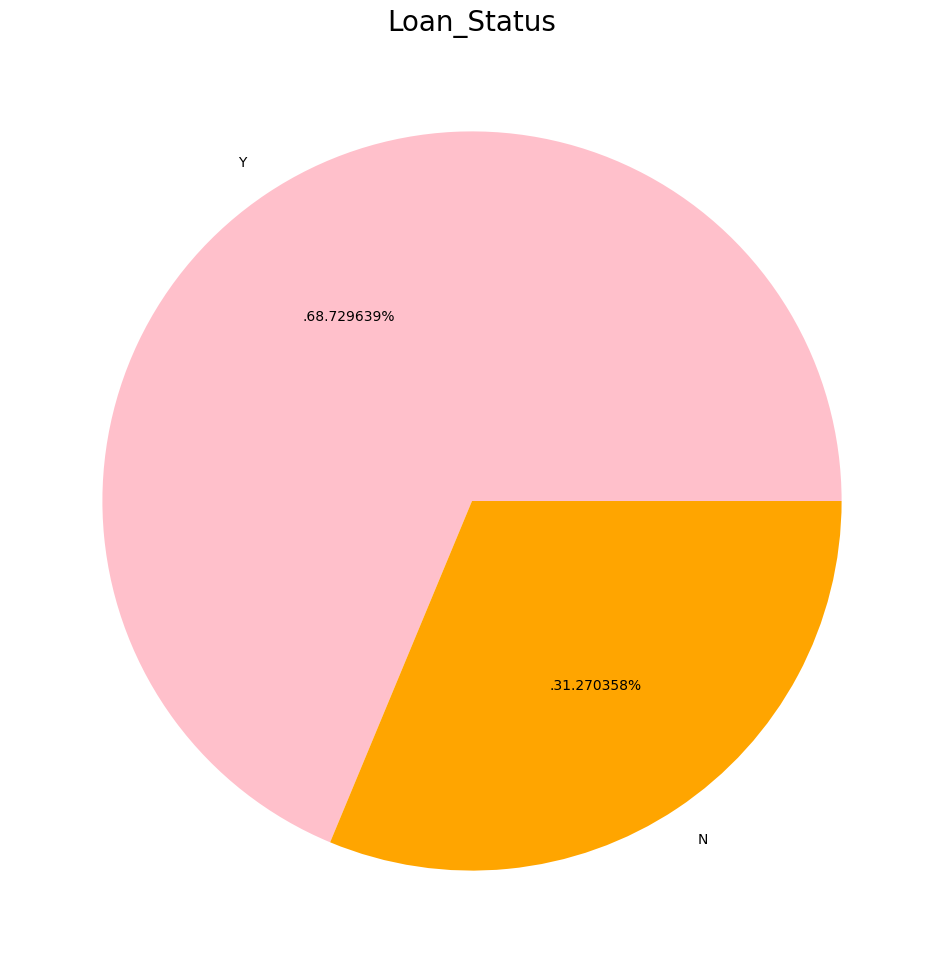

In [24]:
# Graphical representation of independent variable
size = training_data['Loan_Status'].value_counts()
labels = 'Y', 'N'
color = ['pink','orange']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Loan_Status', fontsize = 20)
plt.axis('off')


From above pie chart we can say that the independent variable i.e. loan status is imbalanced type Y have 68% records and type N contain 31% of records.

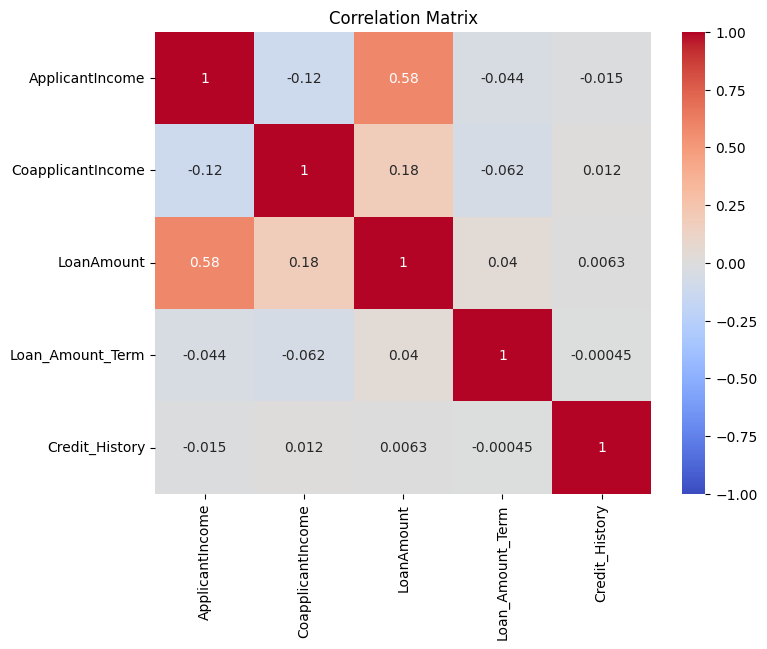

In [39]:
#Computing Correlation matrix of numeric variables using heatmap
numeric_cols = training_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = training_data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation between other numeric variable is less. But the correlation between LoanAmount and applicant income is high i.e 0.58.

### Data Engineering:
1. Missing value detection and imputetaion
2. Duplicate records detection and removal
3. Converting character into numeric

In [25]:
#Checking if the data containg missing values
training_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in both numeric and caractor variables. The size of data is small. So it is not good idea to drop the missing values. So i will be using 
- KNN to impute missing values in numeric variable 
- mode for categorical variable.

In [31]:
##Replacing numeric missing values by using KNN imputer and categorical variable by using mode

# Step 1: Separate numeric and categorical columns
numeric_cols = training_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = training_data.select_dtypes(include=['object']).columns

# Step 2: Impute numeric features using KNNImputer
# Initialize KNNImputer (default n_neighbors=5, can be adjusted)
knn_imputer = KNNImputer(n_neighbors=3)

# Apply KNN Imputer to the numeric columns
training_data[numeric_cols] = knn_imputer.fit_transform(training_data[numeric_cols])

# Step 3: Impute categorical features by mode
for col in categorical_cols:
    mode_value = training_data[col].mode()[0]  # Get the mode (most frequent value)
    training_data[col].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Step 4: Now the DataFrame 'data' contains the imputed values
training_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,138.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
#Checking if data contain duplicate data
training_data.duplicated().sum()

0

So, the dataset doesnot contain any duplicate values.

In [48]:
#Converting Categorical variable to numeric.

vars_2_cat=['Gender','Married','Education','Self_Employed','Loan_Status']
# Replace 'Yes' with 1 and 'No' with 0 in the same column
training_data['Married'] = training_data['Married'].replace({'Yes': 1, 'No': 0})
training_data['Self_Employed'] = training_data['Self_Employed'].replace({'Yes': 1, 'No': 0})
training_data['Loan_Status'] = training_data['Loan_Status'].replace({'Y': 1, 'N': 0})

# Replace 'male' with 1 and 'No' with 0 in the same column
training_data['Gender'] = training_data['Gender'].replace({'Male': 1, 'Female': 0})

# Replace 'Graduate' with 1 and 'No' with 0 in the same column
training_data['Education'] = training_data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})

# Replace 'Urban':2,'Semiurban': 1, 'Rural': 0 in the same column
training_data['Property_Area'] = training_data['Property_Area'].replace({'Urban':2,'Semiurban': 1, 'Rural': 0})

# Replace '3+':3 '2':2,'1': 1, '0': 0 in the same column
training_data['Dependents'] = training_data['Dependents'].replace({'3+':3, '2':2,'1': 1, '0': 0})

training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


### Splitting the data into train and test data

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
X = training_data.drop(['Loan_Status'],axis=1)  # Features
y = training_data['Loan_Status']                   # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Cross-Validation Score: 0.7982477839620697
Test Set Accuracy: 0.7642276422764228


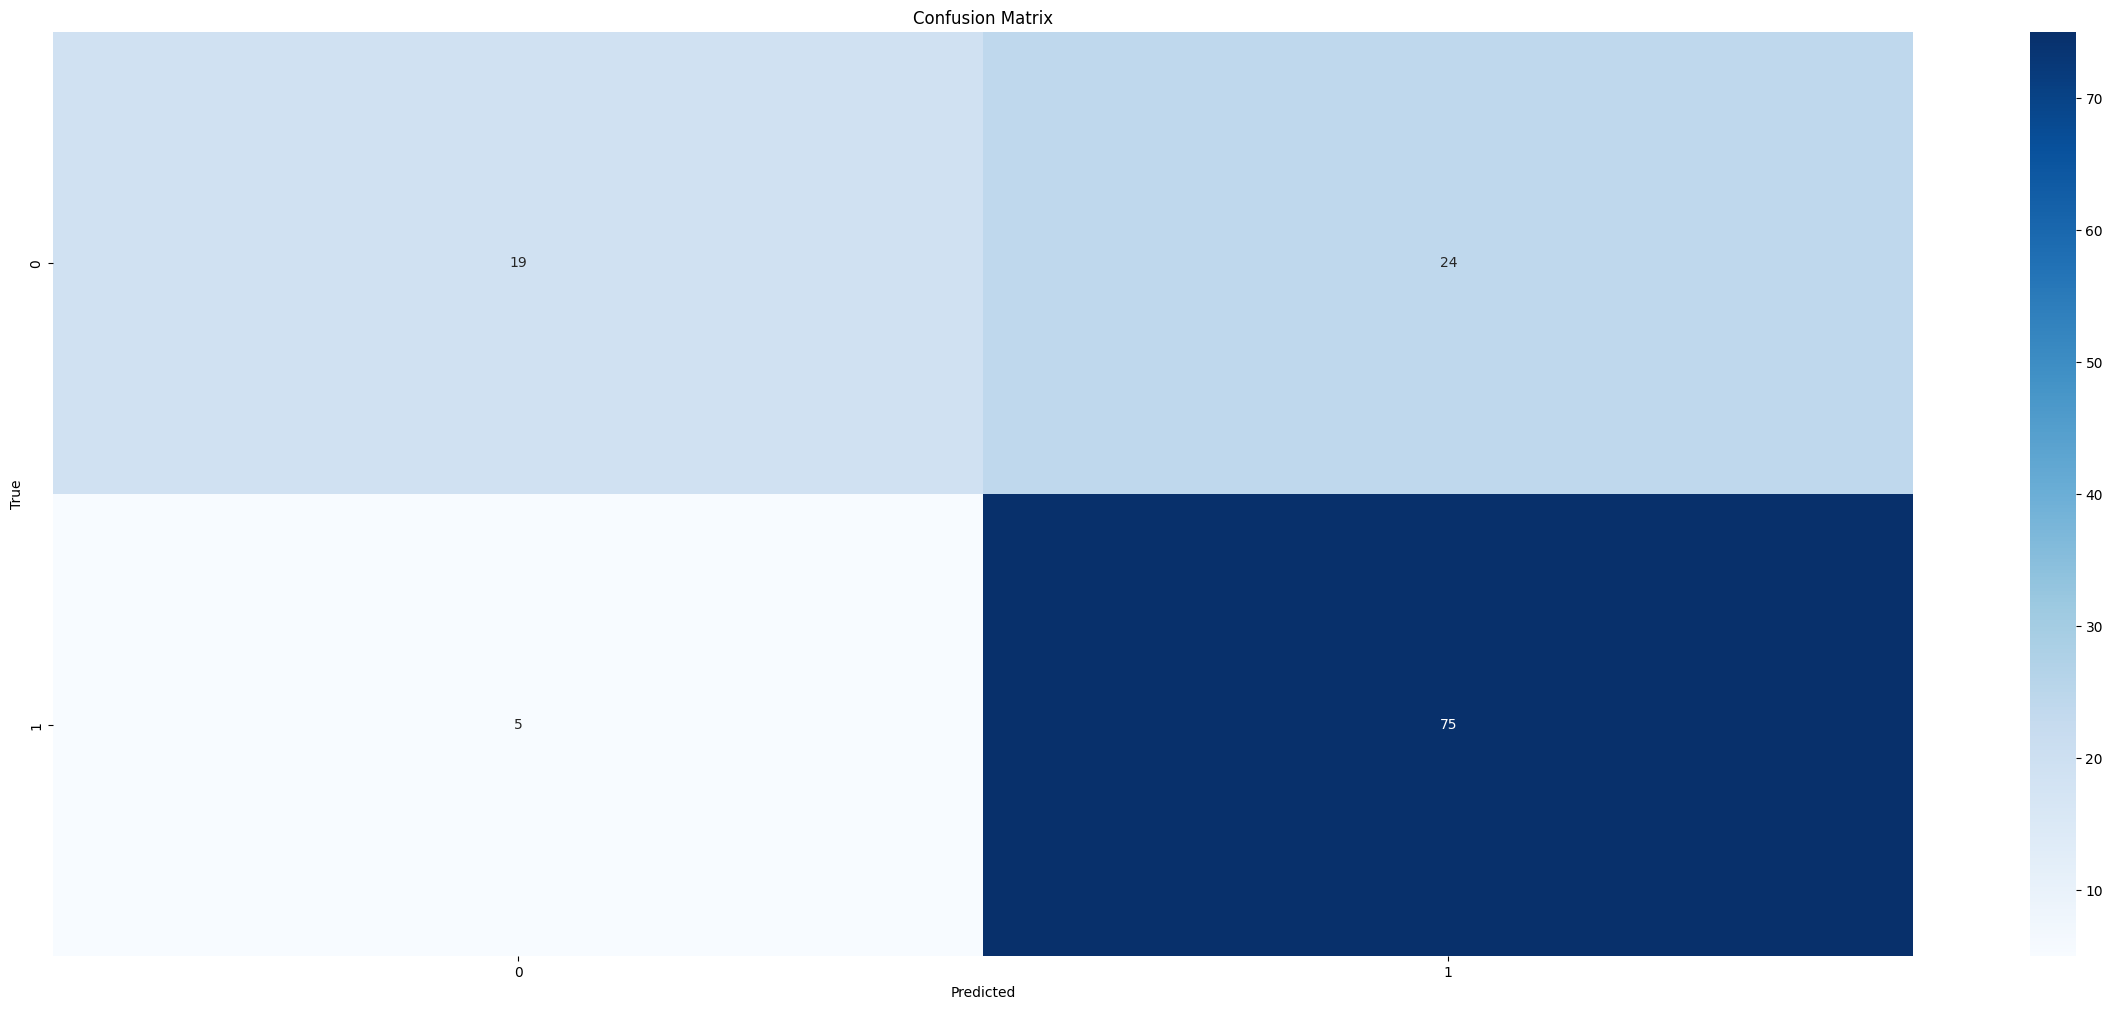

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = RandomForestClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the mean cross-validation score
print("Mean Cross-Validation Score:", cv_scores.mean())

# Step 3: Fit the model on the entire training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 6: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Step 7: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optional: Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Set Accuracy: 0.7723577235772358


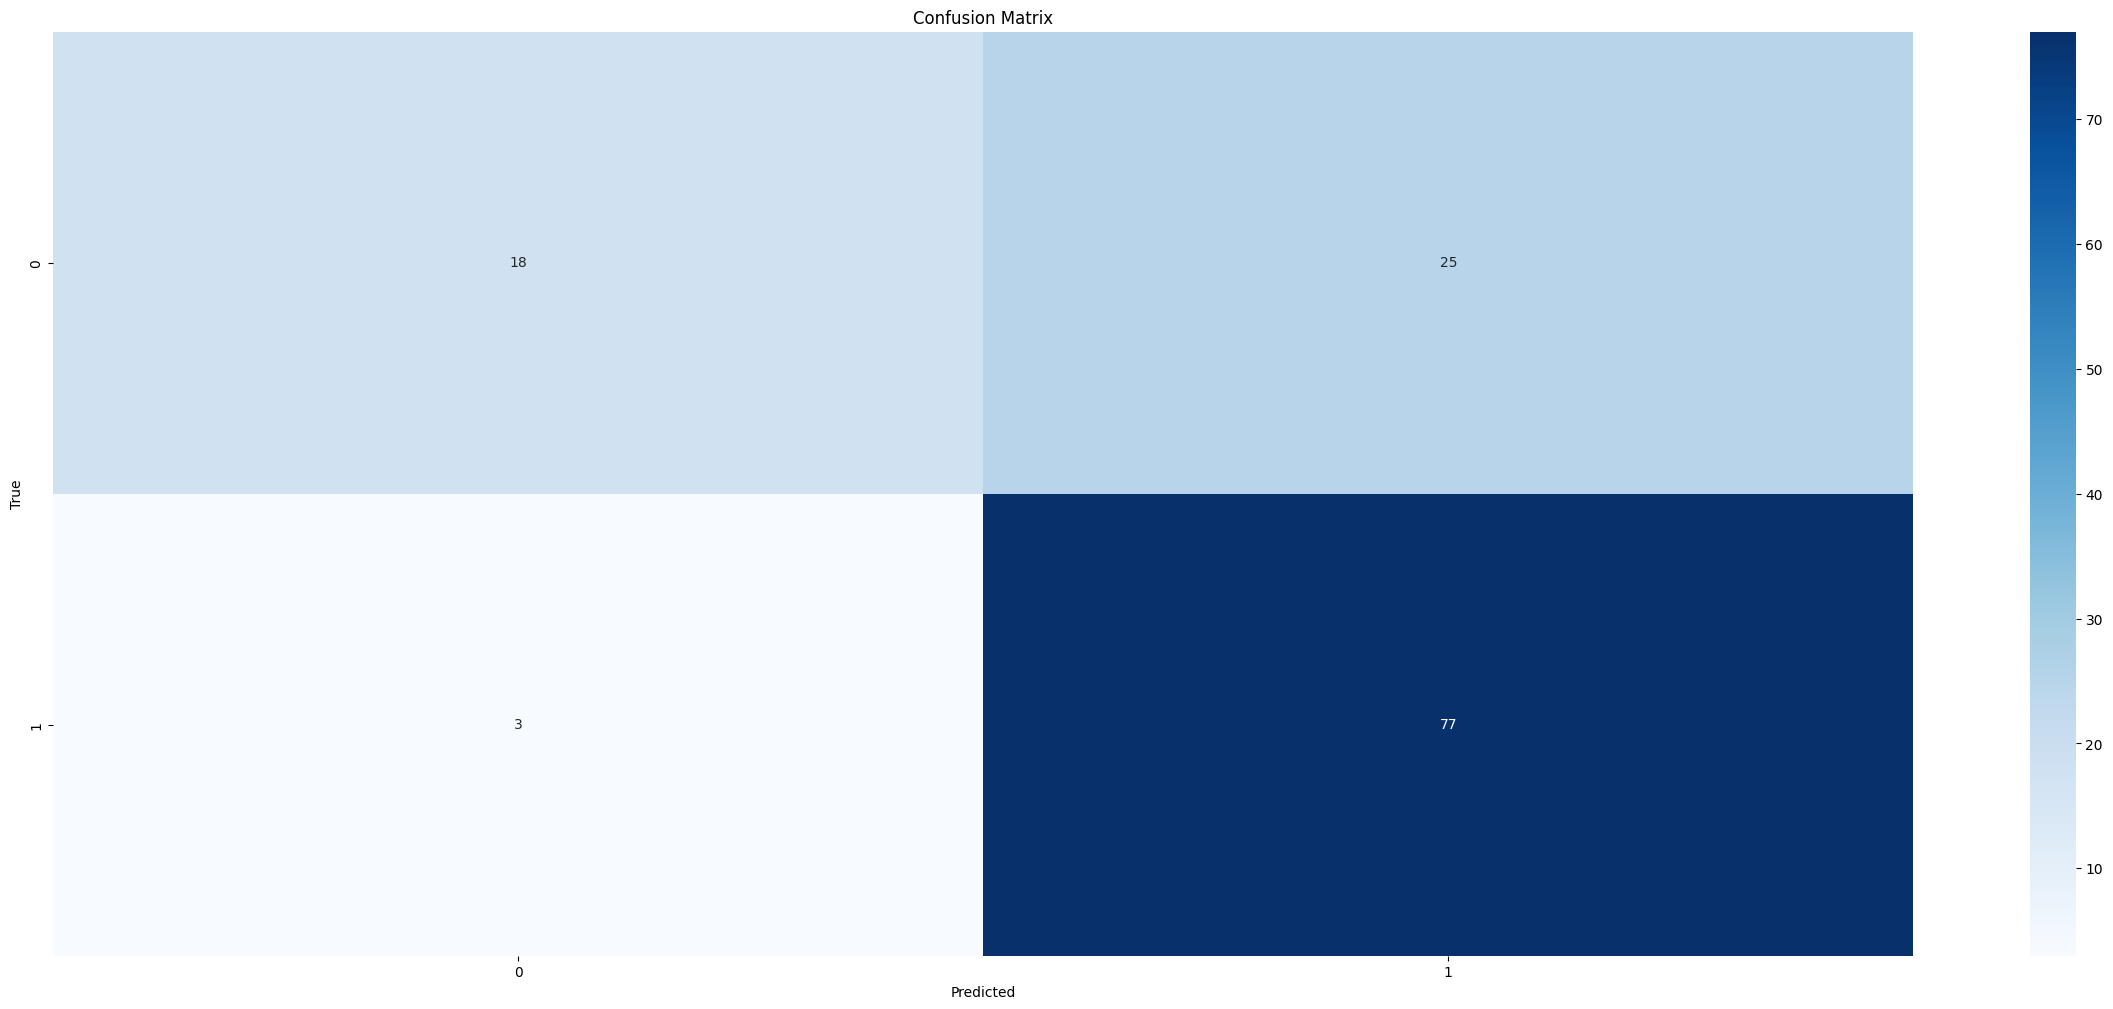

              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],           # Number of trees
    'max_depth': [None, 5, 10, 15],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],          # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]             # Minimum samples at a leaf node
}

# Step 4: Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Step 5: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Step 7: Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Step 9: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optional: Print classification report
print(classification_report(y_test, y_pred))